In [1]:
import os
import pandas as pd
import numpy as np

%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.append('../../../hetnet-ml/src')

import plot_tools as pt

DATA_DIR = '../../data'

paper_figs = os.path.join(DATA_DIR, 'figures/paper_figs')
supp_figs = os.path.join(DATA_DIR, 'figures/supp_figs')
other_figs = os.path.join(DATA_DIR, 'figures/other_figs')

In [2]:
base_dir = os.path.join(DATA_DIR, 'time_networks-6_metanode/2020/alpha_0.1/10x_pos-neg/0_year_diff/' + \
                        'recall-scoring/2_pmids/dwpc_w_0.6/5_fold_CV/')

In [3]:
n_folds = 5

In [4]:
seeds = sorted([d for d in os.listdir(base_dir) if d.startswith('seed')])

all_preds = []

for seed in seeds:
    load_dir = os.path.join(base_dir, seed)
    all_preds.append(pd.read_csv(os.path.join(load_dir, 'predictions.csv')))

In [5]:
def plot_seed_roc(dfs, seed, title=None):
    ys = []
    y_preds = []
    for fold in range(n_folds):
        y_true = dfs[seed].query("holdout_fold == @fold")['status'].values
        y_pred = dfs[seed].query("holdout_fold == @fold")['probas_{}'.format(fold)].values
    
        ys.append(y_true)
        y_preds.append(y_pred)
    
        pt.graph_single_roc(y_true, y_pred, 'Fold {}'.format(fold), alpha=.6, lw=2)
    
    pt.graph_mean_roc(ys, y_preds, lw=4)
    if title:
        fig = pt.graph_roc_boilerplate(title)
    else:
        fig = pt.graph_roc_boilerplate('Test set ROCs for seed {}'.format(seed))
    return fig
    
def plot_seed_prc(dfs, seed, title=None):    
    ys = []
    y_preds = []
    for fold in range(n_folds):
        y_true = dfs[seed].query("holdout_fold == @fold")['status'].values
        y_pred = dfs[seed].query("holdout_fold == @fold")['probas_{}'.format(fold)].values

        ys.append(y_true)
        y_preds.append(y_pred)

        pt.graph_single_prc(y_true, y_pred, 'Fold {}'.format(fold), alpha=.6, lw=2)

    pt.graph_mean_prc(ys, y_preds, lw=4)
    
    if title:
        fig = pt.graph_prc_boilerplate(title)
    else:
        fig = pt.graph_prc_boilerplate('Test set Precision Recall Curve for seed {}'.format(seed))
    return fig

    

## Standard 5-fold X-val

In this standard paradigm, the indications list was split into 5 equal pieces, so that the training and holdout indications were of the same number for each fold.  However, a given compound or disease could be in both the the training and testing sets.

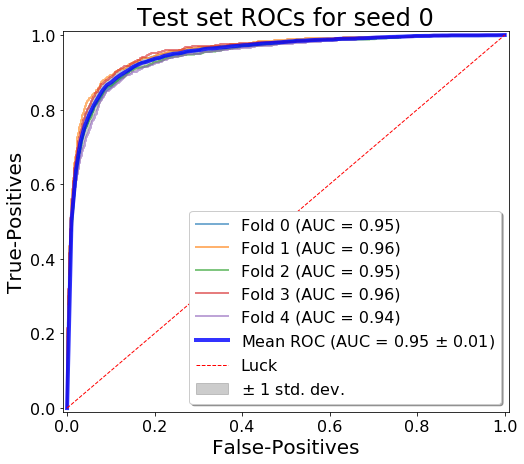

In [6]:
plot_seed_roc(all_preds, 0);

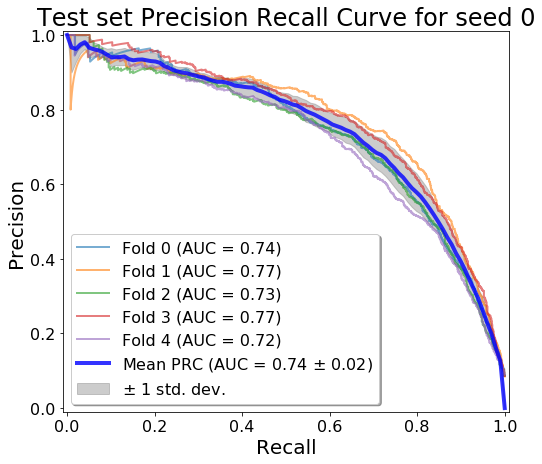

In [7]:
plot_seed_prc(all_preds, 0);

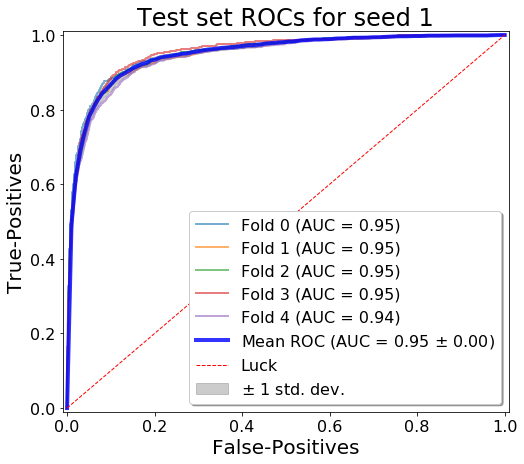

In [8]:
plot_seed_roc(all_preds, 1);

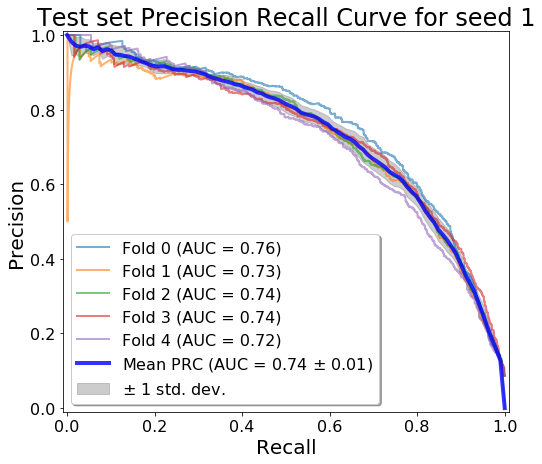

In [9]:
plot_seed_prc(all_preds, 1);

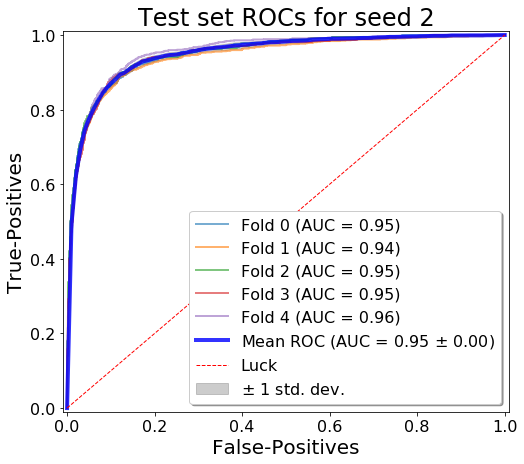

In [10]:
plot_seed_roc(all_preds, 2);

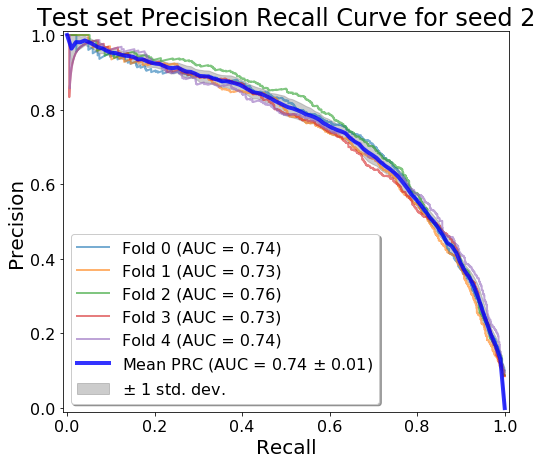

In [11]:
plot_seed_prc(all_preds, 2);

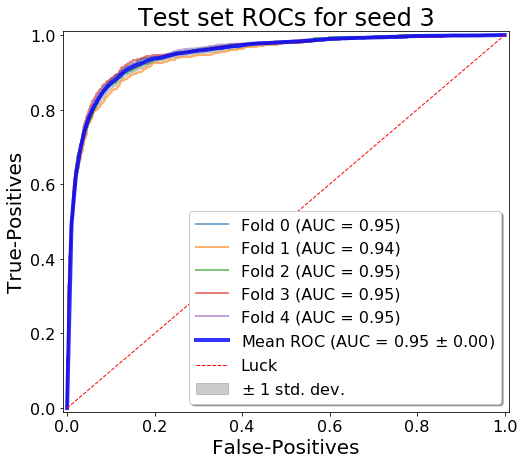

In [12]:
plot_seed_roc(all_preds, 3);

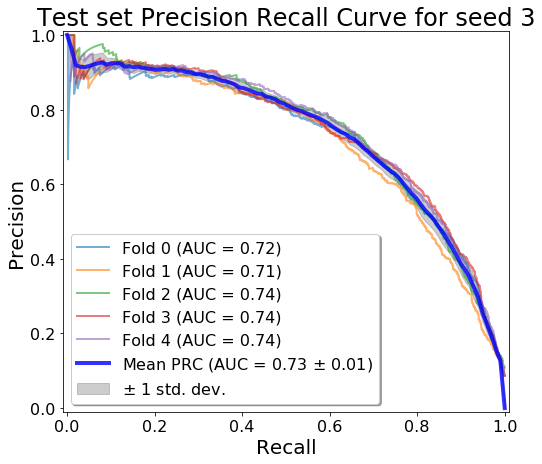

In [13]:
plot_seed_prc(all_preds, 3);

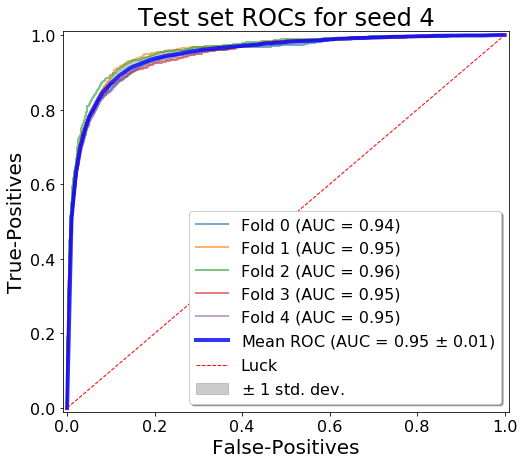

In [14]:
plot_seed_roc(all_preds, 4);

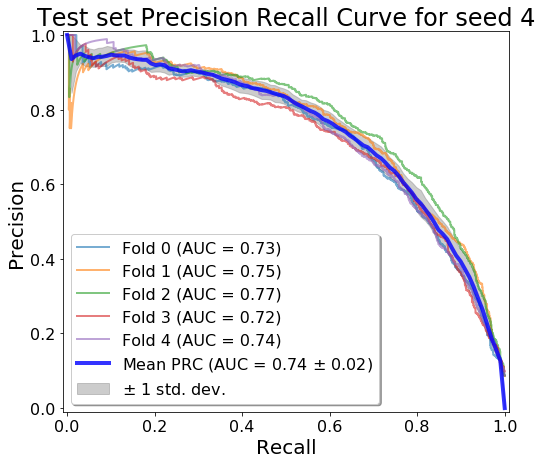

In [15]:
plot_seed_prc(all_preds, 4);

In [16]:
roc_results = []
prc_results = []

for preds in all_preds:

    ys = []
    y_preds = []
    for fold in range(n_folds):
        y_true = preds.query("holdout_fold == @fold")['status'].values
        y_pred = preds.query("holdout_fold == @fold")['probas_{}'.format(fold)].values
    
        ys.append(y_true)
        y_preds.append(y_pred)
    
    roc_results.append(pt.calc_mean_roc_auc(ys, y_preds))
    prc_results.append(pt.calc_mean_prc_auc(ys, y_preds))

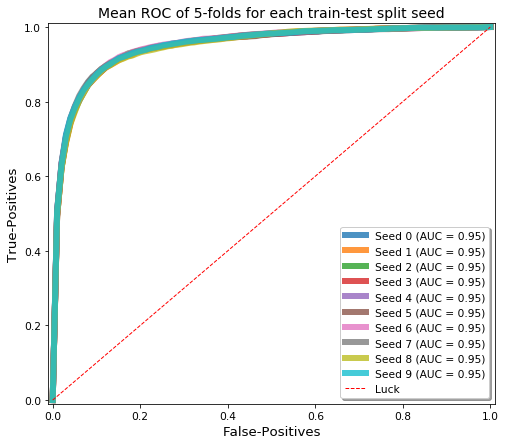

In [17]:
for i, result in enumerate(roc_results):
    pt.graph_mean_roc_from_metrics(*result, label='Seed {}'.format(i), fill_between=False)
pt.graph_roc_boilerplate('Mean ROC of 5-folds for each train-test split seed', size=16)
plt.title('Mean ROC of 5-folds for each train-test split seed', size=14)
plt.savefig(os.path.join(paper_figs, '1A.svg'), bbox_inches='tight', pad_inches=0.1);

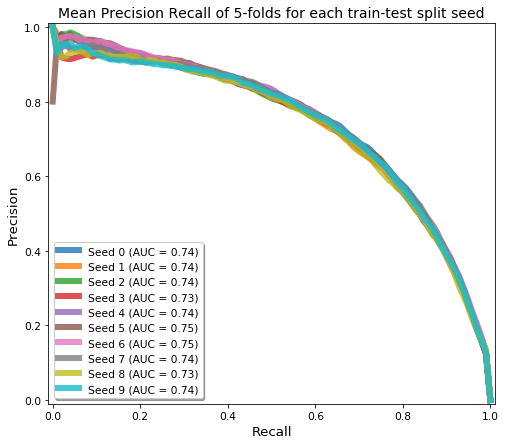

In [18]:
for i, result in enumerate(prc_results):
    pt.graph_mean_prc_from_metrics(*result, label='Seed {}'.format(i), fill_between=False)
pt.graph_prc_boilerplate('Mean Precision Recall of 5-folds for each train-test split seed', size=16)
plt.title('Mean Precision Recall of 5-folds for each train-test split seed', size=14)
plt.savefig(os.path.join(paper_figs, '1B.svg'), bbox_inches='tight', pad_inches=0.1);

## Comp X-val analysis

Similar ROC analysis for the seeds of the Comp X-val splitting paradigm:

In comp x-val, the True-positive indication list was split into 5 folds of equal numbers of unique compounds.  Holdout postives and negatives for a fold all containted the compounds, so that they were never seen for the training porition.

In [19]:
base_dir_cx = os.path.join(DATA_DIR, 'time_networks-6_metanode/2020/alpha_0.1/10x_pos-neg/0_year_diff/' + \
                        'recall-scoring/2_pmids/dwpc_w_0.6/5_fold_CV/comp_xval')

In [20]:
seeds_cx = sorted([d for d in os.listdir(base_dir_cx) if d.startswith('seed')])

all_preds_cx = []

for seed in seeds_cx:
    load_dir = os.path.join(base_dir_cx, seed)
    all_preds_cx.append(pd.read_csv(os.path.join(load_dir, 'predictions.csv')))

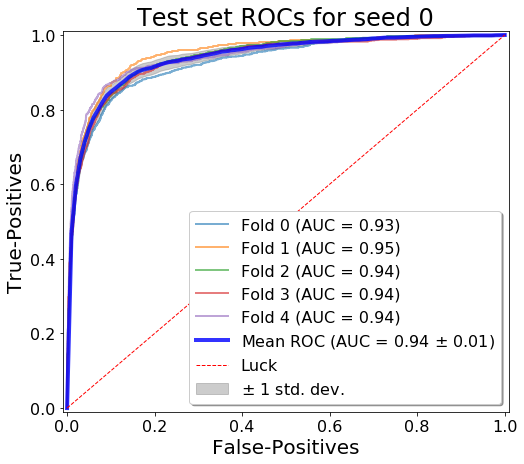

In [21]:
plot_seed_roc(all_preds_cx, 0);

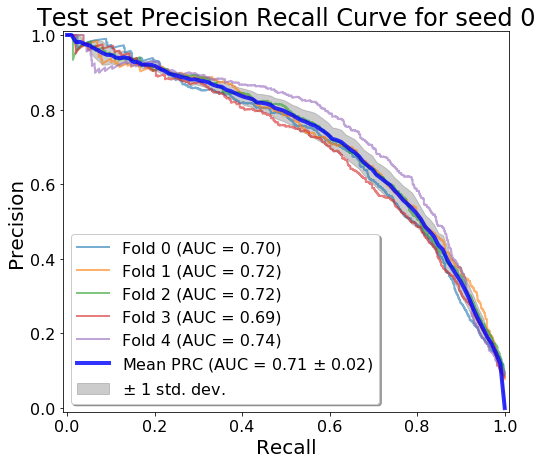

In [22]:
plot_seed_prc(all_preds_cx, 0);

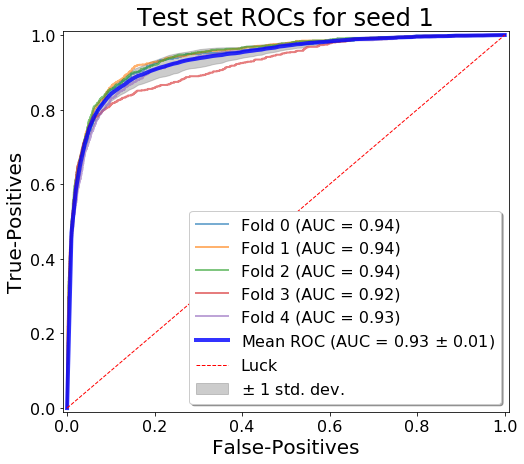

In [23]:
plot_seed_roc(all_preds_cx, 1);

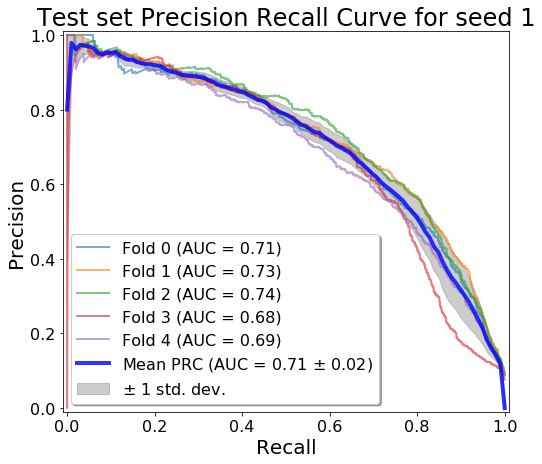

In [24]:
plot_seed_prc(all_preds_cx, 1);

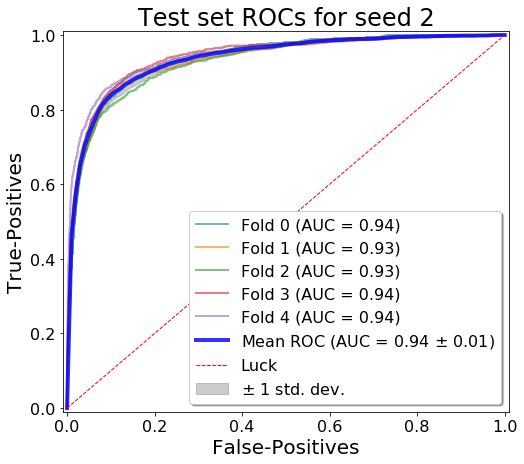

In [25]:
plot_seed_roc(all_preds_cx, 2);

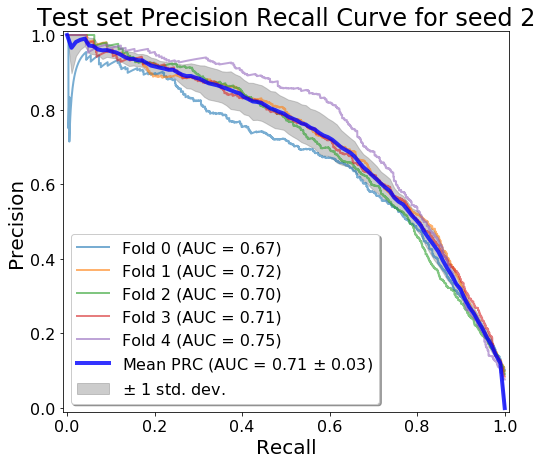

In [26]:
plot_seed_prc(all_preds_cx, 2);

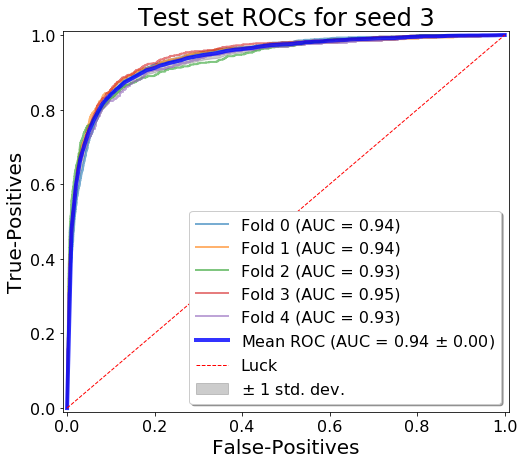

In [27]:
plot_seed_roc(all_preds_cx, 3);

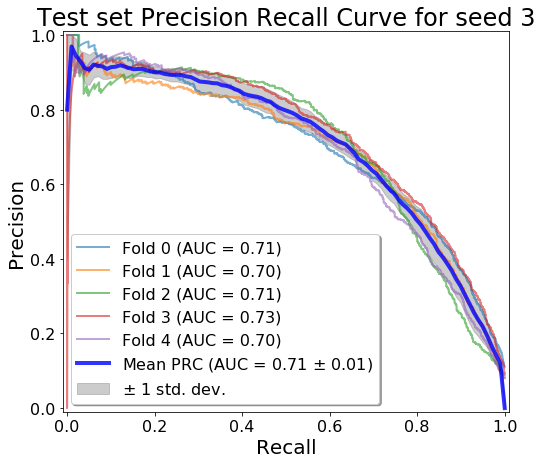

In [28]:
plot_seed_prc(all_preds_cx, 3);

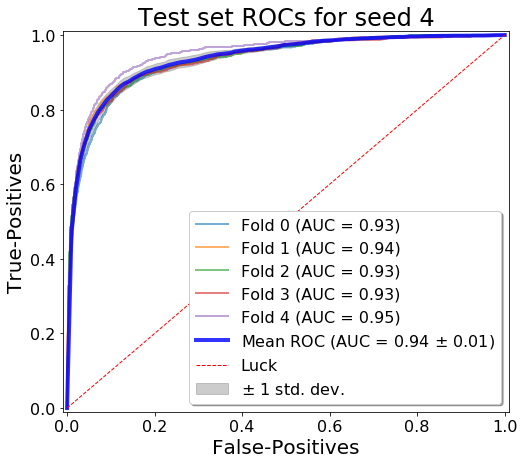

In [29]:
plot_seed_roc(all_preds_cx, 4);

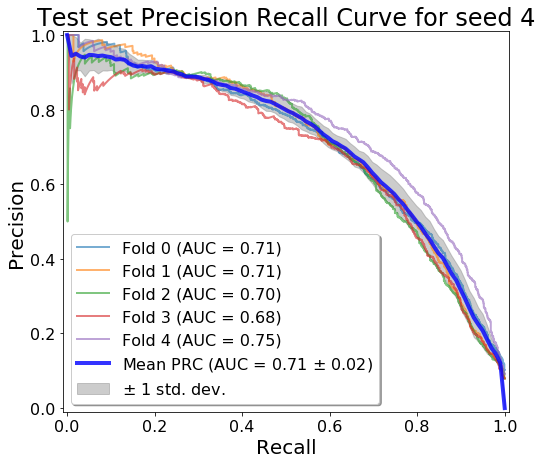

In [30]:
plot_seed_prc(all_preds_cx, 4);

In [31]:
roc_results_cx = []
prc_results_cx = []

for preds in all_preds_cx:

    ys = []
    y_preds = []
    for fold in range(n_folds):
        y_true = preds.query("holdout_fold == @fold")['status'].values
        y_pred = preds.query("holdout_fold == @fold")['probas_{}'.format(fold)].values
    
        ys.append(y_true)
        y_preds.append(y_pred)
    
    roc_results_cx.append(pt.calc_mean_roc_auc(ys, y_preds))
    prc_results_cx.append(pt.calc_mean_prc_auc(ys, y_preds))


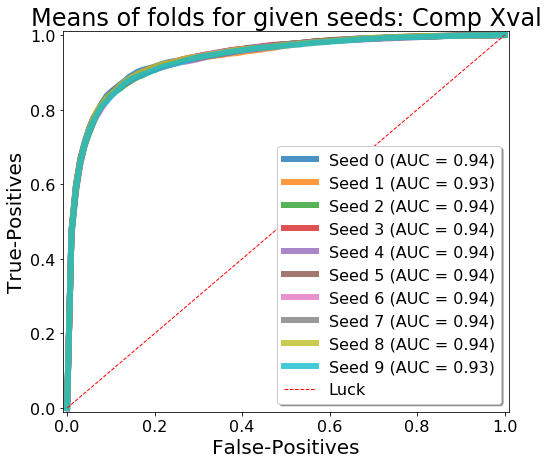

In [32]:
for i, result in enumerate(roc_results_cx):
    pt.graph_mean_roc_from_metrics(*result, label='Seed {}'.format(i), fill_between=False)
pt.graph_roc_boilerplate('Means of folds for given seeds: Comp Xval');

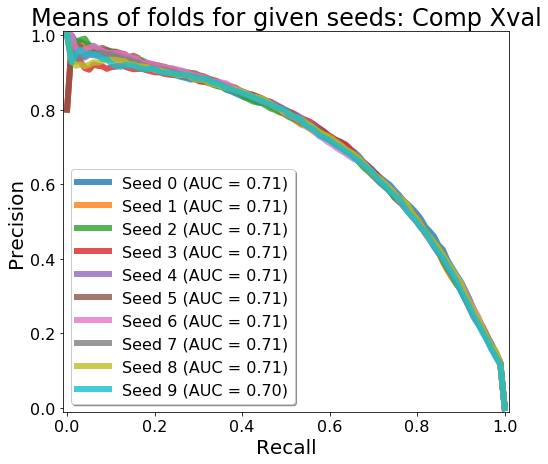

In [33]:
for i, result in enumerate(prc_results_cx):
    pt.graph_mean_prc_from_metrics(*result, label='Seed {}'.format(i), fill_between=False)
pt.graph_prc_boilerplate('Means of folds for given seeds: Comp Xval');

## Individaul CD pair analysis

In [34]:
preds = all_preds[0]
preds.head(2)

,cd_id,cd_name,do_id,do_name,status,approval_year,year_diff,year_cat,holdout_fold,probas_0,...,cd_percentile_0,do_percentile_0,cd_percentile_1,do_percentile_1,cd_percentile_2,do_percentile_2,cd_percentile_3,do_percentile_3,cd_percentile_4,do_percentile_4
0,C010038,azelaic acid,C0001263,Abdominal actinomycosis,0,NaN,NaN,NaN,NaN,0.015725,...,0.517568,0.015789,0.354054,0.000752,0.622973,0.002256,0.397297,0.000752,0.425676,0.000752
1,D003533,Cyproheptadine,C0001263,Abdominal actinomycosis,0,NaN,NaN,NaN,NaN,0.012424,...,0.589189,0.000752,0.648649,0.003759,0.674324,0.009023,0.612162,0.002256,0.628378,0.001504


In [35]:
def percentile_to_rank(col, total_elements):
    return np.round(-1*total_elements * col + (total_elements + 1)).astype(int)

In [36]:
for i in range(n_folds):
    preds['do_rank_{}'.format(i)] = percentile_to_rank(preds['do_percentile_{}'.format(i)], preds['cd_id'].nunique())
    preds['cd_rank_{}'.format(i)] = percentile_to_rank(preds['cd_percentile_{}'.format(i)], preds['do_id'].nunique())

In [37]:
cutoffs = [20, 100]
rank_cats = ['Top {}'.format(cutoffs[0]), '{}-{}'.format(cutoffs[0]+1, cutoffs[1]), '> {}'.format(cutoffs[1])]

def get_rank_cat(rank):
    if rank <= cutoffs[0]:
        return rank_cats[0]
    
    elif rank > cutoffs[0] and rank <= cutoffs[1]:
        return rank_cats[1]
    
    else:
        return rank_cats[2]

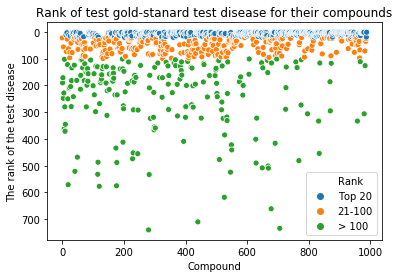

In [38]:
test_fold = 0

curr_fold_test_cd_ranks = preds.query('holdout_fold == @test_fold and status == 1')[['cd_id',
                                'do_id', 'cd_rank_{}'.format(test_fold)]].reset_index(drop=True)

curr_fold_test_cd_ranks['Rank'] = curr_fold_test_cd_ranks['cd_rank_{}'.format(test_fold)].apply(lambda r: get_rank_cat(r))


ax = sns.scatterplot(x='index', y='cd_rank_{}'.format(test_fold), data=curr_fold_test_cd_ranks.reset_index(),
                     hue='Rank', hue_order=rank_cats)

plt.title('Rank of test gold-stanard test disease for their compounds')
plt.xlabel('Compound')
plt.ylabel('The rank of the test disease')
plt.legend(loc='lower right')

ax.invert_yaxis();

In [39]:
n_dis = preds['do_id'].nunique()

/opt/mmayers/software/anaconda3/envs/integrate/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


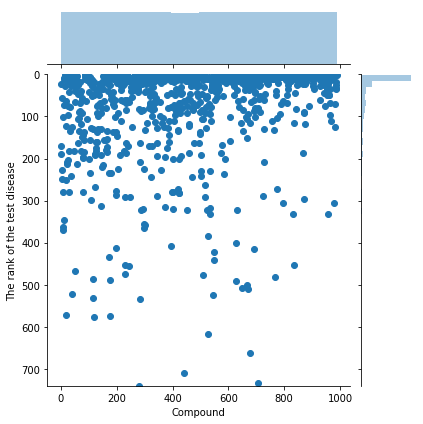

In [40]:
test_fold = 0

curr_fold_test_cd_ranks = preds.query('holdout_fold == @test_fold and status == 1')[['cd_id',
                                'do_id', 'cd_rank_{}'.format(test_fold)]].reset_index(drop=True)

curr_fold_test_cd_ranks['Rank'] = curr_fold_test_cd_ranks['cd_rank_{}'.format(test_fold)].apply(lambda r: get_rank_cat(r))


g = sns.jointplot(x='index', y='cd_rank_{}'.format(test_fold), data=curr_fold_test_cd_ranks.reset_index(),
                  ylim=(n_dis, 0))

g.set_axis_labels('Compound', 'The rank of the test disease');

/opt/mmayers/software/anaconda3/envs/integrate/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


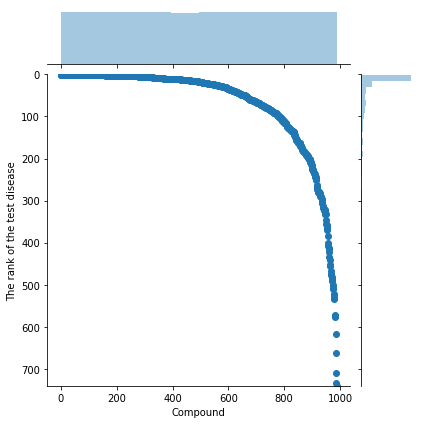

In [41]:
test_fold = 0

curr_fold_test_cd_ranks = (preds.query('holdout_fold == @test_fold and status == 1')[['cd_id',
                                 'do_id', 'cd_rank_{}'.format(test_fold)]].reset_index(drop=True)
                                                                          .sort_values('cd_rank_{}'.format(test_fold))
                                                                          .reset_index(drop=True))

curr_fold_test_cd_ranks['Rank'] = curr_fold_test_cd_ranks['cd_rank_{}'.format(test_fold)].apply(lambda r: get_rank_cat(r))


g = sns.jointplot(x='index', y='cd_rank_{}'.format(test_fold), data=curr_fold_test_cd_ranks.reset_index(),
                  ylim=(n_dis, 0))

g.set_axis_labels('Compound', 'The rank of the test disease');

/opt/mmayers/software/anaconda3/envs/integrate/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


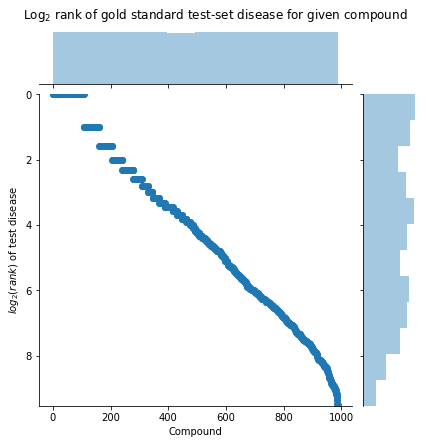

In [42]:
test_fold = 0

curr_fold_test_cd_ranks = (preds.query('holdout_fold == @test_fold and status == 1')[['cd_id',
                                 'do_id', 'cd_rank_{}'.format(test_fold)]].reset_index(drop=True)
                                                                          .sort_values('cd_rank_{}'.format(test_fold))
                                                                          .reset_index(drop=True))

curr_fold_test_cd_ranks['log_rank'] = np.log2(curr_fold_test_cd_ranks['cd_rank_{}'.format(test_fold)])

curr_fold_test_cd_ranks['Rank'] = curr_fold_test_cd_ranks['cd_rank_{}'.format(test_fold)].apply(lambda r: get_rank_cat(r))


g = sns.jointplot(x='index', y='log_rank', data=curr_fold_test_cd_ranks.reset_index(),
                  ylim=(curr_fold_test_cd_ranks['log_rank'].max(), 0))


g.set_axis_labels('Compound', r'$log_2(rank)$ of test disease');
g.fig.suptitle(r'Log$_2$ rank of gold standard test-set disease for given compound', y=1.02)

plt.savefig(os.path.join(other_figs, 'log2_rank_disease-vs-ordered_compound.svg'), bbox_inches='tight', pad_inches=0.1);

/opt/mmayers/software/anaconda3/envs/integrate/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


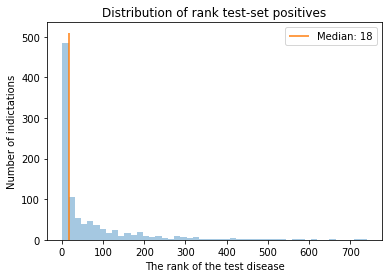

In [43]:
sns.distplot(curr_fold_test_cd_ranks['cd_rank_{}'.format(test_fold)], kde=False)
plt.title('Distribution of rank test-set positives')
plt.xlabel('The rank of the test disease')
plt.ylabel('Number of indictations')

med = curr_fold_test_cd_ranks['cd_rank_{}'.format(test_fold)].median()
b, t = plt.ylim()

plt.vlines(med, b, t, colors=sns.color_palette()[1], label='Median: {}'.format(int(med)))
plt.legend();

/opt/mmayers/software/anaconda3/envs/integrate/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


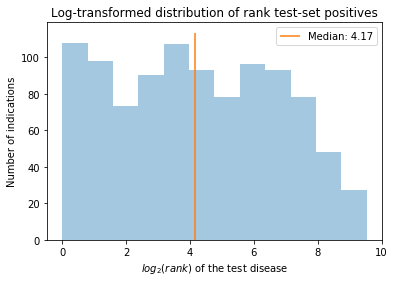

In [44]:
sns.distplot(curr_fold_test_cd_ranks['log_rank'], kde=False)
plt.title('Log-transformed distribution of rank test-set positives')
plt.xlabel(r'$log_2(rank)$'+' of the test disease')
plt.ylabel('Number of indications')

med = curr_fold_test_cd_ranks['log_rank'].median()
b, t = plt.ylim()

plt.vlines(med, b, t, colors=sns.color_palette()[1], label='Median: {:.2f}'.format(med))
plt.legend()
plt.savefig(os.path.join(paper_figs, '1C.svg'), bbox_inches='tight', pad_inches=0.1);

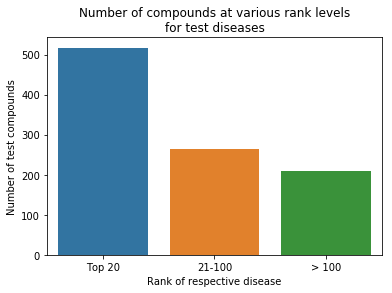

In [45]:
sns.barplot(x='index', y='Rank', data=curr_fold_test_cd_ranks['Rank'].value_counts().reset_index())
plt.title('Number of compounds at various rank levels\nfor test diseases')
plt.xlabel('Rank of respective disease')
plt.ylabel('Number of test compounds');

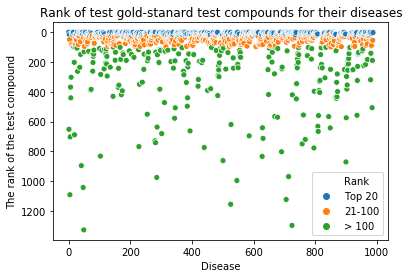

In [46]:
test_fold = 0

curr_fold_test_do_ranks = preds.query('holdout_fold == @test_fold and status == 1')[['do_id',
                                'cd_id', 'do_rank_{}'.format(test_fold)]].reset_index(drop=True)

curr_fold_test_do_ranks['Rank'] = curr_fold_test_do_ranks['do_rank_{}'.format(test_fold)].apply(lambda r: get_rank_cat(r))


ax = sns.scatterplot(x='index', y='do_rank_{}'.format(test_fold), data=curr_fold_test_do_ranks.reset_index(),
                     hue='Rank', hue_order=rank_cats)

plt.title('Rank of test gold-stanard test compounds for their diseases')
plt.xlabel('Disease')
plt.ylabel('The rank of the test compound')
plt.legend(loc='lower right')

ax.invert_yaxis();

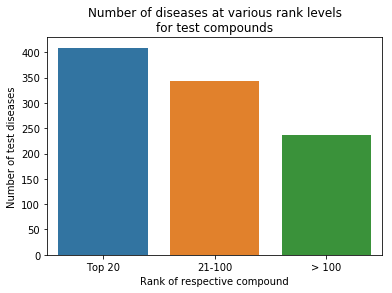

In [47]:
sns.barplot(x='index', y='Rank', data=curr_fold_test_do_ranks['Rank'].value_counts().reset_index())
plt.title('Number of diseases at various rank levels\nfor test compounds')
plt.xlabel('Rank of respective compound')
plt.ylabel('Number of test diseases');

In [48]:
n_comp = preds['cd_id'].nunique()

/opt/mmayers/software/anaconda3/envs/integrate/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


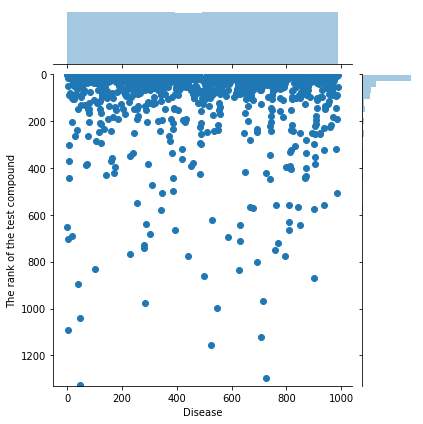

In [49]:
test_fold = 0

curr_fold_test_do_ranks = preds.query('holdout_fold == @test_fold and status == 1')[['cd_id',
                                'do_id', 'do_rank_{}'.format(test_fold)]].reset_index(drop=True)

curr_fold_test_do_ranks['Rank'] = curr_fold_test_do_ranks['do_rank_{}'.format(test_fold)].apply(lambda r: get_rank_cat(r))


g = sns.jointplot(x='index', y='do_rank_{}'.format(test_fold), data=curr_fold_test_do_ranks.reset_index(),
                  ylim=(n_comp, 0))


g.set_axis_labels('Disease', 'The rank of the test compound');


/opt/mmayers/software/anaconda3/envs/integrate/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


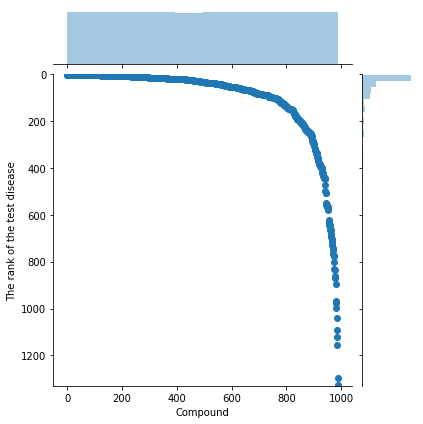

In [50]:
test_fold = 0

curr_fold_test_do_ranks = (preds.query('holdout_fold == @test_fold and status == 1')[['cd_id',
                                 'do_id', 'do_rank_{}'.format(test_fold)]].reset_index(drop=True)
                                                                          .sort_values('do_rank_{}'.format(test_fold))
                                                                          .reset_index(drop=True))

curr_fold_test_do_ranks['Rank'] = curr_fold_test_do_ranks['do_rank_{}'.format(test_fold)].apply(lambda r: get_rank_cat(r))


g = sns.jointplot(x='index', y='do_rank_{}'.format(test_fold), data=curr_fold_test_do_ranks.reset_index(),
                  ylim=(n_comp, 0))


g.set_axis_labels('Compound', 'The rank of the test disease');


/opt/mmayers/software/anaconda3/envs/integrate/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


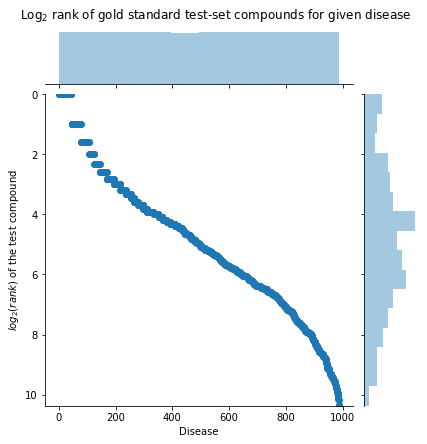

In [51]:
test_fold = 0

curr_fold_test_do_ranks = (preds.query('holdout_fold == @test_fold and status == 1')[['cd_id',
                                 'do_id', 'do_rank_{}'.format(test_fold)]].reset_index(drop=True)
                                                                          .sort_values('do_rank_{}'.format(test_fold))
                                                                          .reset_index(drop=True))

curr_fold_test_do_ranks['Rank'] = curr_fold_test_do_ranks['do_rank_{}'.format(test_fold)].apply(lambda r: get_rank_cat(r))

curr_fold_test_do_ranks['log_rank'] = np.log2(curr_fold_test_do_ranks['do_rank_{}'.format(test_fold)])


g = sns.jointplot(x='index', y='log_rank'.format(test_fold), data=curr_fold_test_do_ranks.reset_index(),
                  ylim=(curr_fold_test_do_ranks['log_rank'].max(), 0))

g.set_axis_labels('Disease', r'$log_2(rank)$ of the test compound');

g.fig.suptitle(r'Log$_2$ rank of gold standard test-set compounds for given disease', y=1.02)
plt.savefig(os.path.join(other_figs, 'log2_rank_compound-vs-ordered_disease.svg'), bbox_inches='tight', pad_inches=0.1);

/opt/mmayers/software/anaconda3/envs/integrate/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


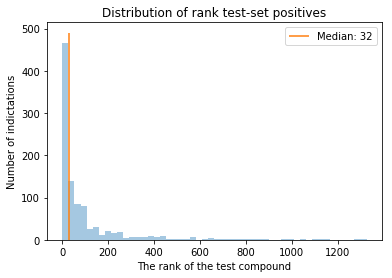

In [52]:
sns.distplot(curr_fold_test_do_ranks['do_rank_{}'.format(test_fold)], kde=False)
plt.title('Distribution of rank test-set positives')
plt.xlabel('The rank of the test compound')
plt.ylabel('Number of indictations')

med = curr_fold_test_do_ranks['do_rank_{}'.format(test_fold)].median()
b, t = plt.ylim()

plt.vlines(med, b, t, colors=sns.color_palette()[1], label='Median: {}'.format(int(med)))
plt.legend();

/opt/mmayers/software/anaconda3/envs/integrate/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


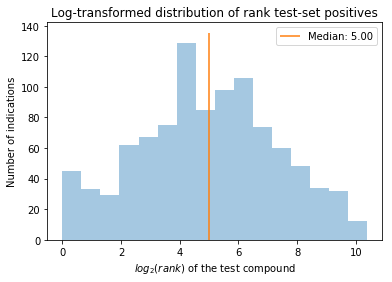

In [53]:
sns.distplot(curr_fold_test_do_ranks['log_rank'.format(test_fold)], kde=False)
plt.title('Log-transformed distribution of rank test-set positives')
plt.xlabel(r'$log_2(rank)$'+' of the test compound')
plt.ylabel('Number of indications')

med = curr_fold_test_do_ranks['log_rank'].median()
b, t = plt.ylim()

plt.vlines(med, b, t, colors=sns.color_palette()[1], label='Median: {:.2f}'.format(med))
plt.legend()
plt.savefig(os.path.join(paper_figs, '1D.svg'), bbox_inches='tight', pad_inches=0.1);

## Feature Selection Analysis 5-fold, single-seed

In [54]:
coef = pd.read_csv(os.path.join(load_dir, 'model_coefficients.csv'))

In [55]:
coef.head()

,feature,coef_0,zcoef_0,coef_1,zcoef_1,coef_2,zcoef_2,coef_3,zcoef_3,coef_4,zcoef_4
0,intercept,-3.412510,-3.412510,-3.269804,-3.269806,-3.334345,-3.334343,-3.451485,-3.451488,-4.035054,-4.035057
1,degree_CDafA,0.000293,0.000293,0.000000,0.000000,0.000000,0.000000,0.013137,0.013136,0.007291,0.007291
2,degree_CDafPH,0.183636,0.183634,0.111566,0.111565,0.181883,0.181881,0.214601,0.214599,0.361049,0.361046
3,degree_CDagPS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,degree_CDawPS,0.070661,0.070661,0.064688,0.064688,0.043279,0.043278,0.075500,0.075499,-0.058596,-0.058595


In [56]:
cols = [c for c in coef.columns if c.startswith('coef_')]

/opt/mmayers/software/anaconda3/envs/integrate/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


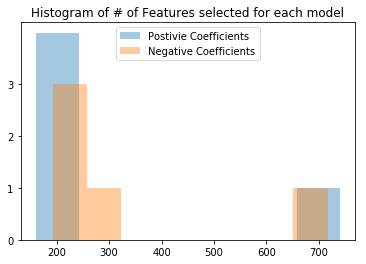

In [57]:
sns.distplot((coef[cols] > 0).sum(), kde=False, label='Postivie Coefficients')
sns.distplot((coef[cols] < 0).sum(), kde=False, label='Negative Coefficients')
plt.title('Histogram of # of Features selected for each model')
plt.yticks([0,1,2,3])
plt.legend(loc=9);

In [58]:
(coef.T != 0.0).sum(axis=1)

feature    2244
coef_0      467
zcoef_0     467
coef_1      352
zcoef_1     352
coef_2      383
zcoef_2     383
coef_3      514
zcoef_3     514
coef_4     1458
zcoef_4    1458
dtype: int64

In [59]:
pos_counts = (coef[cols] > 0).sum().rename('value').to_frame().reset_index().rename(columns={'index': 'fold'})
pos_counts['Coefficient Sign'] = 'Postivie'

neg_counts = (coef[cols] < 0).sum().rename('value').to_frame().reset_index().rename(columns={'index': 'fold'})
neg_counts['Coefficient Sign'] = 'Negative'


coef_counts = pd.concat([pos_counts, neg_counts])

coef_counts['fold'] = coef_counts['fold'].map(lambda v: v.split('_')[-1]).astype(int)

In [60]:
coef_counts

,fold,value,Coefficient Sign
0,0,215,Postivie
1,1,160,Postivie
2,2,165,Postivie
3,3,236,Postivie
4,4,741,Postivie
0,0,252,Negative
1,1,192,Negative
2,2,218,Negative
3,3,278,Negative
4,4,717,Negative


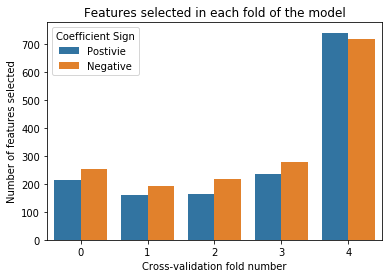

In [61]:
sns.barplot(x='fold', y='value', data=coef_counts, hue='Coefficient Sign')
plt.title('Features selected in each fold of the model')

plt.xlabel('Cross-validation fold number')
plt.ylabel('Number of features selected');

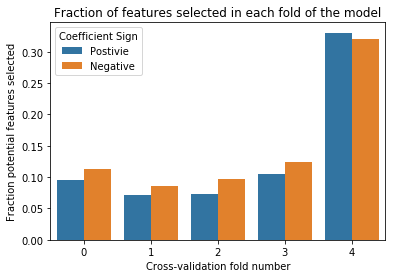

In [62]:
total_feature_number = len(coef)
coef_counts['percent'] = coef_counts['value'] / total_feature_number

sns.barplot(x='fold', y='percent', data=coef_counts, hue='Coefficient Sign')
plt.title('Fraction of features selected in each fold of the model')

plt.xlabel('Cross-validation fold number')
plt.ylabel('Fraction potential features selected');

In [63]:
weighted_coef = (coef.set_index('feature') / coef.set_index('feature').max()).reset_index()
weighted_coef['mean_val'] = weighted_coef[cols].mean(axis=1)
weighted_coef = weighted_coef.sort_values('mean_val', ascending=False).reset_index(drop=True)

weighted_coef.head(2)

,feature,coef_0,zcoef_0,coef_1,zcoef_1,coef_2,zcoef_2,coef_3,zcoef_3,coef_4,zcoef_4,mean_val
0,dwpc_CDtDOawDO,1.000000,1.000000,0.954673,0.954673,0.894231,0.894231,0.987308,0.987308,1.000000,1.000000,0.967243
1,dwpc_CDrtCDtDO,0.974089,0.974089,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.839171,0.839171,0.962652


In [64]:
trans_coef = pd.melt(weighted_coef, id_vars=['feature'], value_vars=cols)

In [65]:
top_features = trans_coef['feature'][:10].values

In [66]:
sorted_features = trans_coef['feature'].values

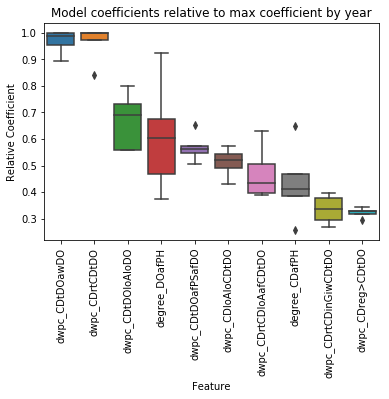

In [67]:
data = trans_coef.query('feature in @top_features')

sns.boxplot(x='feature', y='value', data=data)
plt.xlabel('Feature')
plt.ylabel('Relative Coefficient')
plt.title('Model coefficients relative to max coefficient by year')
plt.xticks(rotation=90);

In [68]:
coef['mean_coef'] = coef[cols].mean(axis=1)
unweight_trans_coef = pd.melt(coef.sort_values('mean_coef', ascending=False), id_vars=['feature'], value_vars=cols)

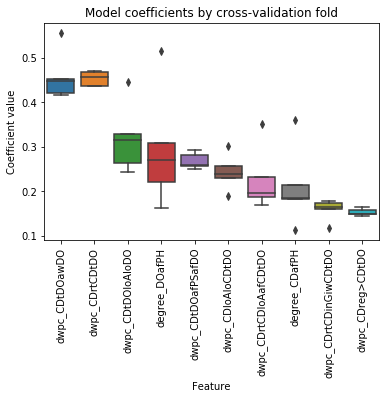

In [69]:
data = unweight_trans_coef.query('feature in @top_features')

sns.boxplot(x='feature', y='value', data=data)
plt.xlabel('Feature')
plt.ylabel('Coefficient value')
plt.title('Model coefficients by cross-validation fold')
plt.xticks(rotation=90);

# Coef analysis across all seeds (Split by Indication)

In [70]:
all_coefs = []

for i, seed in enumerate(seeds):
    
    load_dir = os.path.join(base_dir, seed)
    coefs = pd.read_csv(os.path.join(load_dir, 'model_coefficients.csv'))
    coefs = coefs.set_index('feature')
    cols = [c for c in coefs.columns if c.startswith('coef_')]
    coefs = coefs[cols]
    coefs.columns = [c+'_s{}'.format(i) for c in coefs.columns]
    all_coefs.append(coefs)
    
all_coefs = pd.concat(all_coefs, axis=1, sort=False).reset_index().rename(columns={'index': 'feature'})
all_coefs.head(2)

,feature,coef_0_s0,coef_1_s0,coef_2_s0,coef_3_s0,coef_4_s0,coef_0_s1,coef_1_s1,coef_2_s1,coef_3_s1,...,coef_0_s8,coef_1_s8,coef_2_s8,coef_3_s8,coef_4_s8,coef_0_s9,coef_1_s9,coef_2_s9,coef_3_s9,coef_4_s9
0,intercept,-3.519031,-3.563305,-3.421330,-3.402177,-3.528625,-3.390927,-3.341598,-3.336434,-3.544151,...,-3.375200,-3.381161,-3.443976,-3.306347,-3.293142,-3.462692,-3.404066,-3.553517,-3.382849,-3.419979
1,degree_CDafA,0.010857,0.040373,0.008969,0.025311,0.000000,0.019002,0.000000,0.008566,0.017446,...,0.022027,0.023514,0.041799,0.021085,0.000000,0.019691,0.000000,0.029351,0.010483,0.026191


In [71]:
cols = [c for c in all_coefs.columns if c.startswith('coef_')]

weighted_coef = (all_coefs.set_index('feature') / all_coefs.set_index('feature').max()).reset_index()
weighted_coef['mean_val'] = weighted_coef[cols].mean(axis=1)
weighted_coef = weighted_coef.sort_values('mean_val', ascending=False).reset_index(drop=True)

weighted_coef.head(2)

,feature,coef_0_s0,coef_1_s0,coef_2_s0,coef_3_s0,coef_4_s0,coef_0_s1,coef_1_s1,coef_2_s1,coef_3_s1,...,coef_1_s8,coef_2_s8,coef_3_s8,coef_4_s8,coef_0_s9,coef_1_s9,coef_2_s9,coef_3_s9,coef_4_s9,mean_val
0,dwpc_CDrtCDtDO,0.872835,0.891926,1.000000,0.950326,0.989099,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,0.993284
1,dwpc_CDtDOawDO,1.000000,1.000000,0.954841,1.000000,1.000000,0.927051,0.900825,0.925743,0.919095,...,0.916418,0.890177,0.930842,0.910561,0.95166,0.94065,0.924916,0.972575,0.989173,0.946874


In [72]:
trans_coef = pd.melt(weighted_coef, id_vars=['feature'], value_vars=cols)
top_features = trans_coef['feature'][:10].values
sorted_features = trans_coef['feature'].values

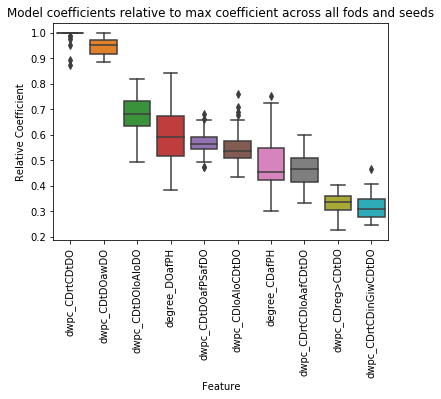

In [73]:
data = trans_coef.query('feature in @top_features')

sns.boxplot(x='feature', y='value', data=data)
plt.xlabel('Feature')
plt.ylabel('Relative Coefficient')
plt.title('Model coefficients relative to max coefficient across all fods and seeds')
plt.xticks(rotation=90);

In [74]:
all_coefs['mean_coef'] = all_coefs[cols].mean(axis=1)
unweight_trans_coef = pd.melt(all_coefs.sort_values('mean_coef', ascending=False), 
                                 id_vars=['feature'], value_vars=cols)

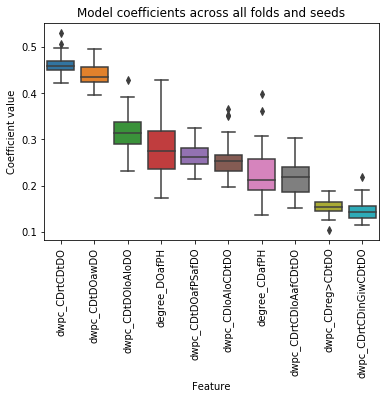

In [75]:
data = unweight_trans_coef.query('feature in @top_features')

sns.boxplot(x='feature', y='value', data=data)
plt.xlabel('Feature')
plt.ylabel('Coefficient value')
plt.title('Model coefficients across all folds and seeds')
plt.xticks(rotation=90)
plt.savefig(os.path.join(paper_figs, '1F.svg'), bbox_inches='tight', pad_inches=0.1);

In [76]:
coef_ranks = []

for col in cols:
    
    cur_rank = all_coefs.sort_values(col, ascending=False).reset_index(drop=True).reset_index().set_index('feature')['index']
    cur_rank = cur_rank.rename(col).astype(int) + 1
    coef_ranks.append(cur_rank.to_frame())

coef_ranks = pd.concat(coef_ranks, axis=1, sort=False).reset_index().rename(columns={'index': 'feature'})
coef_ranks.head(2)

,feature,coef_0_s0,coef_1_s0,coef_2_s0,coef_3_s0,coef_4_s0,coef_0_s1,coef_1_s1,coef_2_s1,coef_3_s1,...,coef_0_s8,coef_1_s8,coef_2_s8,coef_3_s8,coef_4_s8,coef_0_s9,coef_1_s9,coef_2_s9,coef_3_s9,coef_4_s9
0,dwpc_CDtDOawDO,1,1,2,1,1,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1,dwpc_CDrtCDtDO,2,2,1,2,2,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [77]:
coef_ranks['mean_rank'] = coef_ranks[cols].mean(axis=1)
coef_ranks_melt = pd.melt(coef_ranks.sort_values('mean_rank', ascending=True), 
                                 id_vars=['feature'], value_vars=cols)

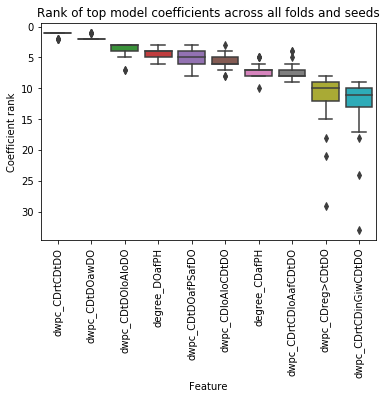

In [78]:
top_features = coef_ranks.sort_values('mean_rank')['feature'].values[:10]
data = coef_ranks_melt.query('feature in @top_features')

ax = sns.boxplot(x='feature', y='value', data=data)
plt.xlabel('Feature')
plt.ylabel('Coefficient rank')
plt.title('Rank of top model coefficients across all folds and seeds')
plt.xticks(rotation=90)

ax.invert_yaxis();

In [79]:
pos_counts = (all_coefs[cols] > 0).sum().rename('value').to_frame().reset_index().rename(columns={'index': 'fold'})
pos_counts['Coefficient Sign'] = 'Positive'

neg_counts = (all_coefs[cols] < 0).sum().rename('value').to_frame().reset_index().rename(columns={'index': 'fold'})
neg_counts['Coefficient Sign'] = 'Negative'


coef_counts = pd.concat([pos_counts, neg_counts])

coef_counts['seed'] = coef_counts['fold'].map(lambda v: v.split('_')[-1][1:]).astype(int)
coef_counts['fold'] = coef_counts['fold'].map(lambda v: v.split('_')[1]).astype(int)

coef_counts['fold_seed'] = coef_counts['fold'].astype(str) + '-' + coef_counts['seed'].astype(str)

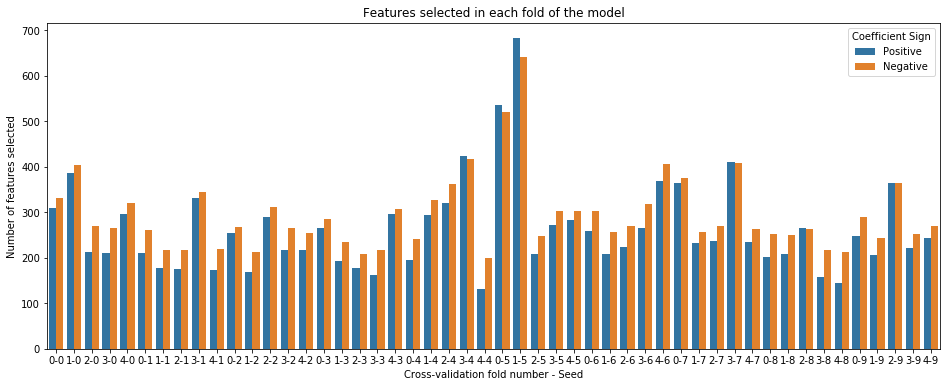

In [80]:
fig = plt.figure()
fig.set_size_inches((16, 6))

sns.barplot(x='fold_seed', y='value', data=coef_counts, hue='Coefficient Sign')


plt.title('Features selected in each fold of the model')

plt.xlabel('Cross-validation fold number - Seed')
plt.ylabel('Number of features selected');

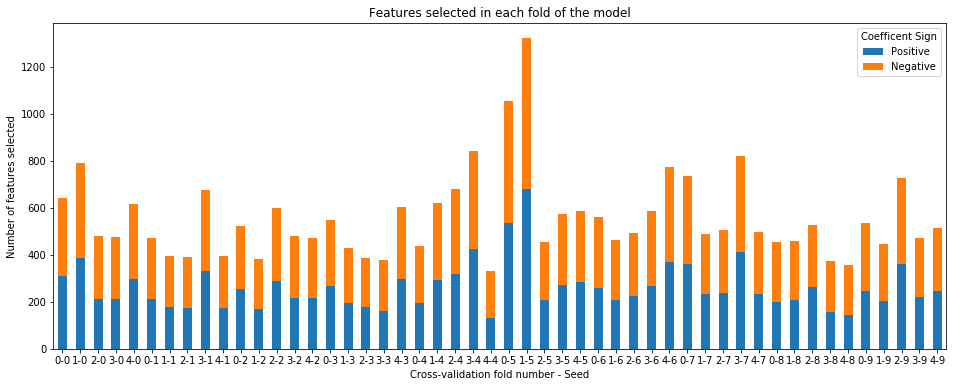

In [81]:
fig = plt.figure()
fig.set_size_inches((16, 6))

#sns.barplot(x='fold_seed', y='value', data=coef_counts, hue='Coefficient Sign')

x = coef_counts['fold_seed'].unique()
pos = coef_counts[coef_counts['Coefficient Sign'] == 'Positive']['value'].values
neg = coef_counts[coef_counts['Coefficient Sign'] == 'Negative']['value'].values

kwargs = {'width': .5, 'align': 'center'}

p1 = plt.bar(x, pos, label='Positive', color=sns.color_palette()[0], **kwargs)
p2 = plt.bar(x, neg, bottom=pos, label='Negative', color=sns.color_palette()[1], **kwargs)

plt.legend(title='Coefficent Sign')
plt.xlim([-.5, len(x)-.5])

plt.title('Features selected in each fold of the model')
plt.xlabel('Cross-validation fold number - Seed')
plt.ylabel('Number of features selected');

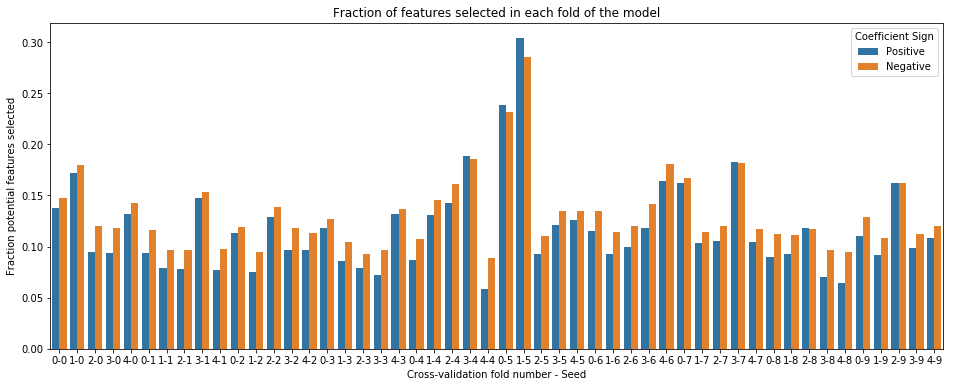

In [82]:
fig = plt.figure()
fig.set_size_inches((16, 6))

total_feature_number = len(all_coefs)
coef_counts['percent'] = coef_counts['value'] / total_feature_number

sns.barplot(x='fold_seed', y='percent', data=coef_counts, hue='Coefficient Sign')
plt.title('Fraction of features selected in each fold of the model')

plt.xlabel('Cross-validation fold number - Seed')
plt.ylabel('Fraction potential features selected');

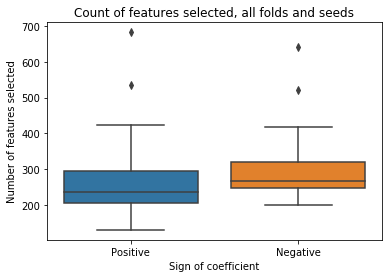

In [83]:
sns.boxplot(x='Coefficient Sign', y='value', data=coef_counts)
#sns.swarmplot(x='Coefficient Sign', y='value', data=coef_counts)
plt.title('Count of features selected, all folds and seeds')

plt.xlabel('Sign of coefficient')
plt.ylabel('Number of features selected');

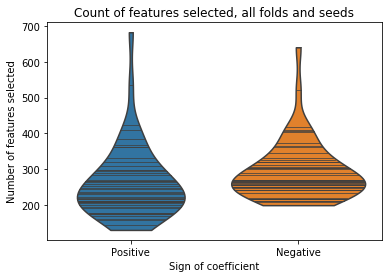

In [84]:
sns.violinplot(x='Coefficient Sign', y='value', data=coef_counts, inner='stick', cut=0)
plt.title('Count of features selected, all folds and seeds')

plt.xlabel('Sign of coefficient')
plt.ylabel('Number of features selected');

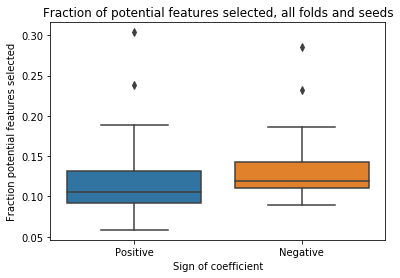

In [85]:
sns.boxplot(x='Coefficient Sign', y='percent', data=coef_counts)
#sns.swarmplot(x='Coefficient Sign', y='percent', data=coef_counts)
plt.title('Fraction of potential features selected, all folds and seeds')

plt.xlabel('Sign of coefficient')
plt.ylabel('Fraction potential features selected');

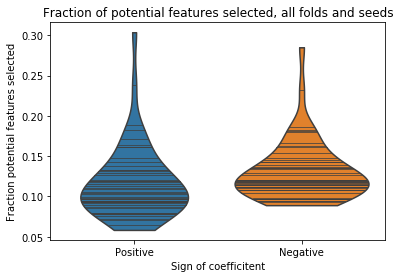

In [86]:
sns.violinplot(x='Coefficient Sign', y='percent', data=coef_counts, inner='stick', cut=0)
plt.title('Fraction of potential features selected, all folds and seeds')

plt.xlabel('Sign of coefficitent')
plt.ylabel('Fraction potential features selected');

In [87]:
coef_counts.head(2)

,fold,value,Coefficient Sign,seed,fold_seed,percent
0,0,310,Positive,0,0-0,0.138146
1,1,385,Positive,0,1-0,0.171569


In [88]:
all_coef_counts = (all_coefs[cols].replace(0, float('nan'))
                                  .count()
                                  .rename('value')
                                  .to_frame()
                                  .reset_index()
                                  .rename(columns={'index': 'fold'}))
all_coef_counts['Coefficient Sign'] = 'Both'


all_coef_counts['seed'] = all_coef_counts['fold'].map(lambda v: v.split('_')[-1][1:]).astype(int)
all_coef_counts['fold'] = all_coef_counts['fold'].map(lambda v: v.split('_')[1]).astype(int)

all_coef_counts['fold_seed'] = all_coef_counts['fold'].astype(str) + '-' + all_coef_counts['seed'].astype(str)

all_coef_counts['percent'] = all_coef_counts['value'] / total_feature_number
                   
all_coef_counts.head(2)

,fold,value,Coefficient Sign,seed,fold_seed,percent
0,0,642,Both,0,0-0,0.286096
1,1,789,Both,0,1-0,0.351604


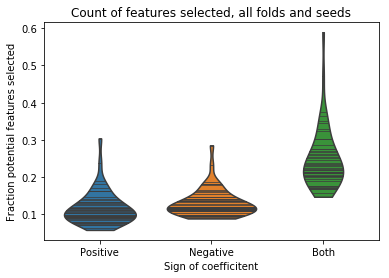

In [89]:
sns.violinplot(x='Coefficient Sign', y='percent', data=pd.concat([coef_counts, all_coef_counts]), inner='stick', cut=0)
plt.title('Count of features selected, all folds and seeds')

plt.xlabel('Sign of coefficitent')
plt.ylabel('Fraction potential features selected');

/opt/mmayers/software/anaconda3/envs/integrate/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


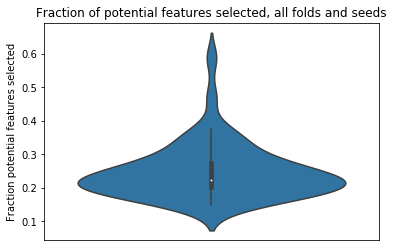

In [90]:
sns.violinplot(y='percent', data=all_coef_counts)
plt.title('Fraction of potential features selected, all folds and seeds')

plt.ylabel('Fraction potential features selected')
plt.xticks([]);

/opt/mmayers/software/anaconda3/envs/integrate/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


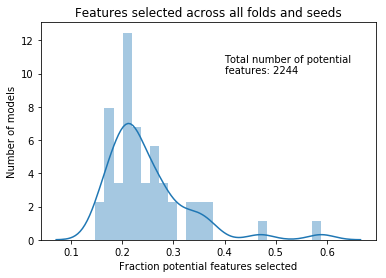

In [91]:
sns.distplot(all_coef_counts['percent'], bins=25)
plt.title('Features selected across all folds and seeds')

plt.xlabel('Fraction potential features selected')
plt.ylabel('Number of models')

plt.text(0.4, 10, 'Total number of potential\nfeatures: {}'.format(len(coefs)))
plt.savefig(os.path.join(paper_figs, '1E.svg'), bbox_inches='tight', pad_inches=0.1);

/opt/mmayers/software/anaconda3/envs/integrate/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


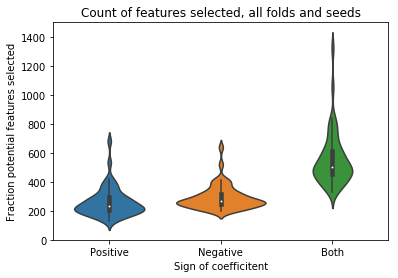

In [92]:
sns.violinplot(x='Coefficient Sign', y='value', data=pd.concat([coef_counts, all_coef_counts]), bw=.3)
plt.title('Count of features selected, all folds and seeds')

plt.xlabel('Sign of coefficitent')
plt.ylabel('Fraction potential features selected');

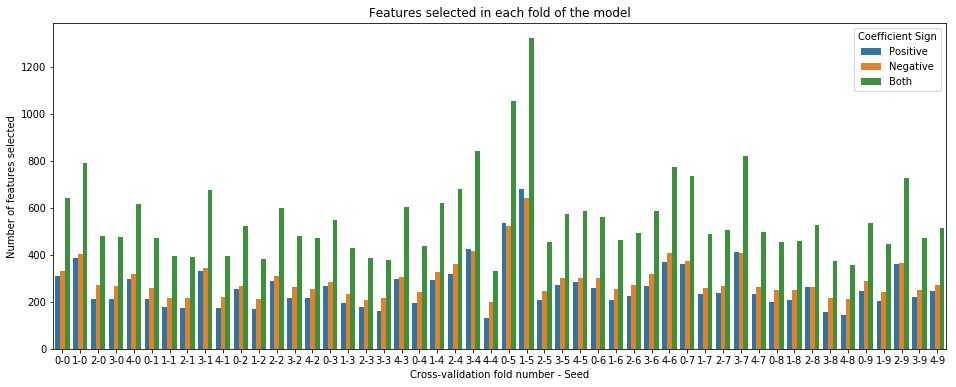

In [93]:
fig = plt.figure()
fig.set_size_inches((16, 6))

sns.barplot(x='fold_seed', y='value', data=pd.concat([coef_counts, all_coef_counts]), hue='Coefficient Sign')


plt.title('Features selected in each fold of the model')

plt.xlabel('Cross-validation fold number - Seed')
plt.ylabel('Number of features selected');

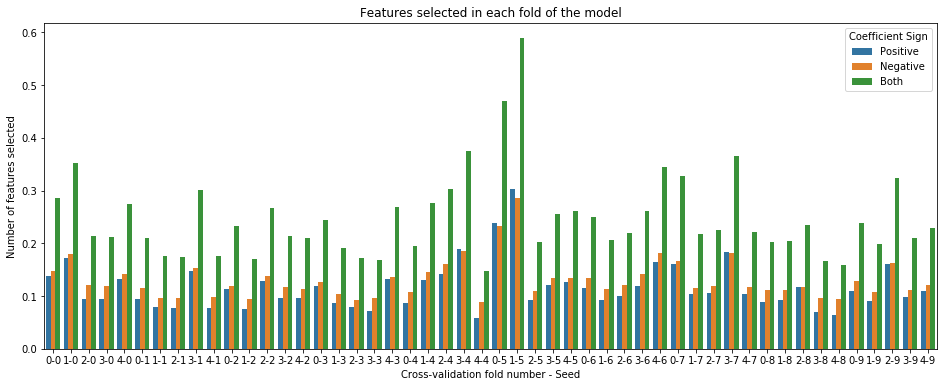

In [94]:
fig = plt.figure()
fig.set_size_inches((16, 6))

sns.barplot(x='fold_seed', y='percent', data=pd.concat([coef_counts, all_coef_counts]), hue='Coefficient Sign')


plt.title('Features selected in each fold of the model')

plt.xlabel('Cross-validation fold number - Seed')
plt.ylabel('Number of features selected');

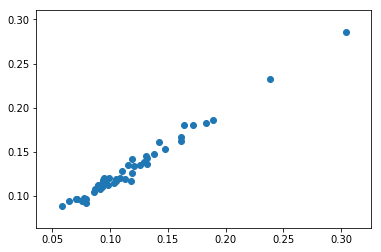

In [95]:
pos = coef_counts[coef_counts['Coefficient Sign'] == 'Positive']['percent'].values
neg = coef_counts[coef_counts['Coefficient Sign'] == 'Negative']['percent'].values

plt.scatter(x=pos, y=neg);

# Coef analysis across all seeds (Comp Xval)

In [96]:
all_coefs_cx = []

for i, seed in enumerate(seeds_cx):
    
    load_dir = os.path.join(base_dir_cx, seed)
    coefs = pd.read_csv(os.path.join(load_dir, 'model_coefficients.csv'))
    coefs = coefs.set_index('feature')
    cols = [c for c in coefs.columns if c.startswith('coef_')]
    coefs = coefs[cols]
    coefs.columns = [c+'_s{}'.format(i) for c in coefs.columns]
    all_coefs_cx.append(coefs)
    
all_coefs_cx = pd.concat(all_coefs_cx, axis=1, sort=False).reset_index().rename(columns={'index': 'feature'})
all_coefs_cx.head(2)

,feature,coef_0_s0,coef_1_s0,coef_2_s0,coef_3_s0,coef_4_s0,coef_0_s1,coef_1_s1,coef_2_s1,coef_3_s1,...,coef_0_s8,coef_1_s8,coef_2_s8,coef_3_s8,coef_4_s8,coef_0_s9,coef_1_s9,coef_2_s9,coef_3_s9,coef_4_s9
0,intercept,-3.556977,-3.303973,-3.523279,-3.266846,-3.636359,-3.398955,-3.484337,-3.251582,-3.206562,...,-3.370581,-3.382583,-3.427241,-3.262249,-3.376872,-3.412510,-3.269804,-3.334345,-3.451485,-4.035054
1,degree_CDafA,0.000000,0.024583,0.000000,0.000000,0.058101,0.000000,0.000000,0.000000,0.000000,...,0.008315,0.000000,0.000000,0.027784,0.039568,0.000293,0.000000,0.000000,0.013137,0.007291


In [97]:
cols = [c for c in all_coefs_cx.columns if c.startswith('coef_')]

weighted_coef_cx = (all_coefs_cx.set_index('feature') / all_coefs_cx.set_index('feature').max()).reset_index()
weighted_coef_cx['mean_val'] = weighted_coef_cx[cols].mean(axis=1)
weighted_coef_cx = weighted_coef_cx.sort_values('mean_val', ascending=False).reset_index(drop=True)

weighted_coef_cx.head(2)

,feature,coef_0_s0,coef_1_s0,coef_2_s0,coef_3_s0,coef_4_s0,coef_0_s1,coef_1_s1,coef_2_s1,coef_3_s1,...,coef_1_s8,coef_2_s8,coef_3_s8,coef_4_s8,coef_0_s9,coef_1_s9,coef_2_s9,coef_3_s9,coef_4_s9,mean_val
0,dwpc_CDrtCDtDO,0.881541,0.93799,0.963962,0.959301,0.859656,0.912828,0.984705,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.974089,1.000000,1.000000,1.000000,0.839171,0.969024
1,dwpc_CDtDOawDO,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.935623,0.867948,...,0.943482,0.931702,0.967409,0.932593,1.000000,0.954673,0.894231,0.987308,1.000000,0.968562


In [98]:
trans_coef_cx = pd.melt(weighted_coef_cx, id_vars=['feature'], value_vars=cols)
top_features_cx = trans_coef_cx['feature'][:10].values
sorted_features_cx = trans_coef_cx['feature'].values

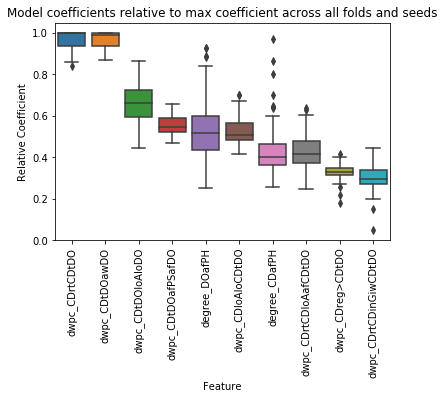

In [99]:
data = trans_coef_cx.query('feature in @top_features_cx')

sns.boxplot(x='feature', y='value', data=data)
plt.xlabel('Feature')
plt.ylabel('Relative Coefficient')
plt.title('Model coefficients relative to max coefficient across all folds and seeds')
plt.xticks(rotation=90);

In [100]:
all_coefs_cx['mean_coef'] = all_coefs_cx[cols].mean(axis=1)
unweight_trans_coef_cx = pd.melt(all_coefs_cx.sort_values('mean_coef', ascending=False), 
                                 id_vars=['feature'], value_vars=cols)

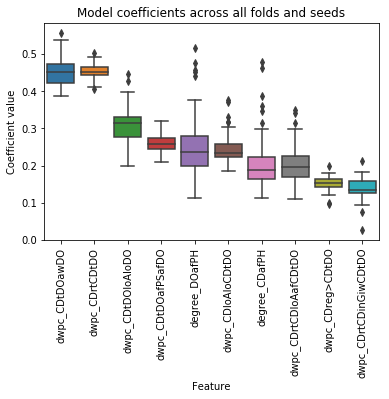

In [101]:
data = unweight_trans_coef_cx.query('feature in @top_features_cx')

sns.boxplot(x='feature', y='value', data=data)
plt.xlabel('Feature')
plt.ylabel('Coefficient value')
plt.title('Model coefficients across all folds and seeds')
plt.xticks(rotation=90);

In [102]:
pos_counts_cx = (all_coefs_cx[cols] > 0).sum().rename('value').to_frame().reset_index().rename(columns={'index': 'fold'})
pos_counts_cx['Coefficient Sign'] = 'Postivie'

neg_counts_cx = (all_coefs_cx[cols] < 0).sum().rename('value').to_frame().reset_index().rename(columns={'index': 'fold'})
neg_counts_cx['Coefficient Sign'] = 'Negative'


coef_counts_cx = pd.concat([pos_counts_cx, neg_counts_cx])

coef_counts_cx['seed'] = coef_counts_cx['fold'].map(lambda v: v.split('_')[-1][1:]).astype(int)
coef_counts_cx['fold'] = coef_counts_cx['fold'].map(lambda v: v.split('_')[1]).astype(int)

coef_counts_cx['fold_seed'] = coef_counts_cx['fold'].astype(str) + '-' + coef_counts_cx['seed'].astype(str)

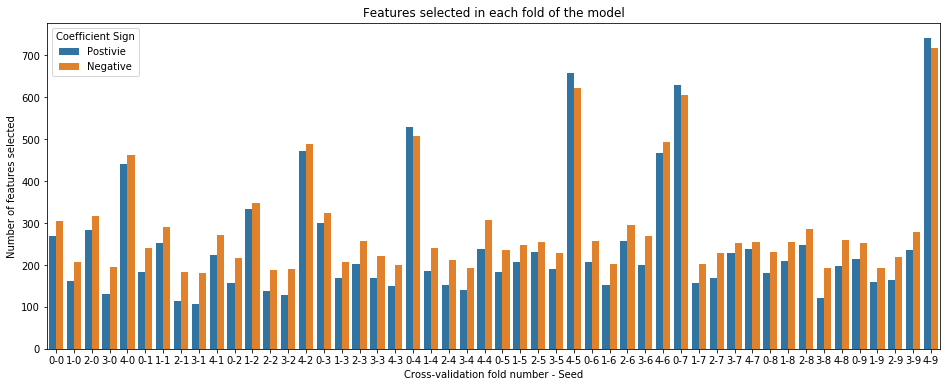

In [103]:
fig = plt.figure()
fig.set_size_inches((16, 6))

sns.barplot(x='fold_seed', y='value', data=coef_counts_cx, hue='Coefficient Sign')

plt.title('Features selected in each fold of the model')

plt.xlabel('Cross-validation fold number - Seed')
plt.ylabel('Number of features selected');

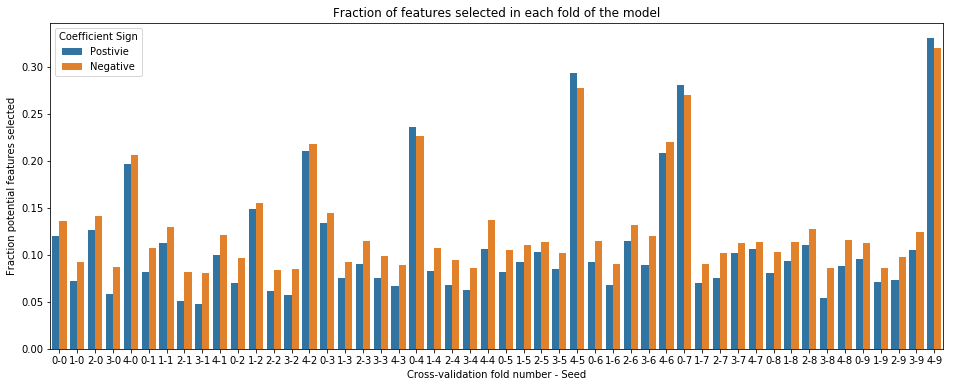

In [104]:
fig = plt.figure()
fig.set_size_inches((16, 6))

total_feature_number_cx = len(all_coefs_cx)
coef_counts_cx['percent'] = coef_counts_cx['value'] / total_feature_number_cx

sns.barplot(x='fold_seed', y='percent', data=coef_counts_cx, hue='Coefficient Sign')
plt.title('Fraction of features selected in each fold of the model')

plt.xlabel('Cross-validation fold number - Seed')
plt.ylabel('Fraction potential features selected');

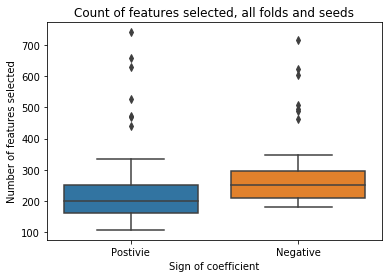

In [105]:
sns.boxplot(x='Coefficient Sign', y='value', data=coef_counts_cx)
plt.title('Count of features selected, all folds and seeds')

plt.xlabel('Sign of coefficient')
plt.ylabel('Number of features selected');

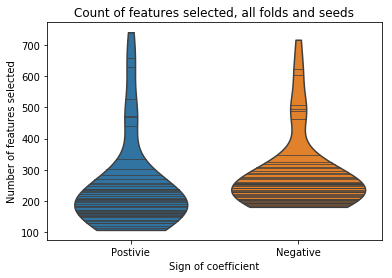

In [106]:
sns.violinplot(x='Coefficient Sign', y='value', data=coef_counts_cx, inner='stick', cut=0)
plt.title('Count of features selected, all folds and seeds')

plt.xlabel('Sign of coefficient')
plt.ylabel('Number of features selected');

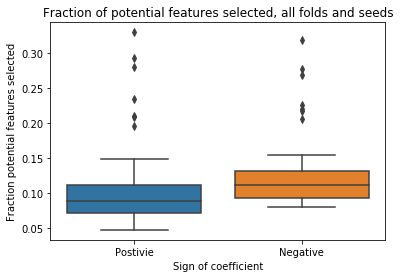

In [107]:
sns.boxplot(x='Coefficient Sign', y='percent', data=coef_counts_cx)
plt.title('Fraction of potential features selected, all folds and seeds')

plt.xlabel('Sign of coefficient')
plt.ylabel('Fraction potential features selected');

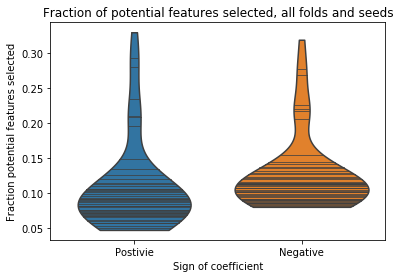

In [108]:
sns.violinplot(x='Coefficient Sign', y='percent', data=coef_counts_cx, inner='stick', cut=0)
plt.title('Fraction of potential features selected, all folds and seeds')

plt.xlabel('Sign of coefficient')
plt.ylabel('Fraction potential features selected');